In [1]:
import pandas as pd;import numpy as np 
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
# import scipy as sp; from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as sch
# from scipy import sparse
import random
import pathlib
from matplotlib.patches import Polygon
import math 

In [ ]:
file_name = 'data_3.csv'
df = pd.read_csv('RL_Data/01_Normal_run/03_Data/'+file_name,converters={'action':pd.eval})

In [11]:
df.columns

Index(['senHouDec_y', 'senTemOA_y', 'senTemRoom_y', 'senTemRoom1_y',
       'senTemRoom2_y', 'senTemRoom3_y', 'senTemRoom4_y', 'maxTemp_y',
       'minTemp_y', 'meanTemp_y',
       ...
       'r_tdisc', 'r_energy', 'r_ppen', 'r_energy_sold', 'act_02', 'act_01',
       'cur_soc', 'pv_pow', 'batt_pow_prov', 'other_info'],
      dtype='object', length=111)

In [3]:
## Getting the data ## 

file_name = 'data_1.csv'
df = pd.read_csv('RL_Data/01_Normal_run_600_v6/03_Data/'+file_name,converters={'action':pd.eval})

df['Room_Air_Temp_Z0']=df['senTemRoom_y'] -273.15
df['Room_Air_Temp_Z1']=df['senTemRoom1_y'] -273.15
df['Room_Air_Temp_Z2']=df['senTemRoom2_y'] -273.15
df['Room_Air_Temp_Z3']=df['senTemRoom3_y'] -273.15
df['Room_Air_Temp_Z4']=df['senTemRoom4_y'] -273.15
df['min_Temp'] = df[['Room_Air_Temp_Z0','Room_Air_Temp_Z1','Room_Air_Temp_Z2','Room_Air_Temp_Z3','Room_Air_Temp_Z4']].min(axis=1)
df['mean_Temp'] = df[['Room_Air_Temp_Z0','Room_Air_Temp_Z1','Room_Air_Temp_Z2','Room_Air_Temp_Z3','Room_Air_Temp_Z4']].mean(axis=1)
df['max_Temp'] = df[['Room_Air_Temp_Z0','Room_Air_Temp_Z1','Room_Air_Temp_Z2','Room_Air_Temp_Z3','Room_Air_Temp_Z4']].max(axis=1)
df['batt_pow_dem'] = df['batt_pow_prov']
df.loc[df['batt_pow_dem']<=0, 'batt_pow_dem'] = 0

df['batt_pow_disc'] = df['batt_pow_prov']*-1
df.loc[df['batt_pow_disc']<=0, 'batt_pow_disc'] = 0

Progress Plots 

In [4]:
progress_plot=plt.figure(figsize=(16,6))
#f.suptitle('DQN Performance in Episode: '+str(episode),size=24, y =.95)
#filt_data["Hours"]= filt_data["Hours"]%24

up_limit=700
low_limit=150
legend_size = 15
font_size = 25


x3 = progess_plot.add_subplot(1,1,1)

#x2.plot(filt_data['Hours'],filt_data["Total_Pow_Dem_0"], label= "Total Power Demand Core ",color="red", linewidth = 1.5,dashes=(4, 2))
#x3.plot(filt_data_st['Hours'],filt_data_st["mean_Temp"], label= "Mean Temp at (Ep: "+str(1)+" (Spawn)",color="steelblue", linewidth = 2)
#x3.step(filt_data_st['Hours'],filt_data_st['Lower_Setpoint'],where="post",label= "Upper/Lower Comfort Band",color="grey",linestyle='--',dashes=(2, 2),linewidth = 2)


x3.set_xlim([7, 100])
x3.set_ylim([low_limit, up_limit])
x3.yaxis.set_major_locator(ticker.MultipleLocator(50))
x3.xaxis.set_major_locator(ticker.MultipleLocator(5))
# x3.axhline(y=800, color='red', linestyle='--', label='7-day Mean Starting Cost [$] in Training using Imitation Learning', linewidth=2.5, dashes=(2, 1),zorder=7)
x3.minorticks_on()
x3.grid(which='major', linewidth=2,color='white')
x3.set_ylabel('Mean Cost [$]',fontsize=font_size,fontweight='bold')
x3.set_xlabel('No of Episodes',fontsize=font_size,fontweight='bold')
x3.set_facecolor("gainsboro")
x3.patch.set_alpha(0.4)
x2a.set_ylabel('All Zones \n Temperature [°C]',fontsize=15,fontweight='bold')
x3.tick_params(axis='y', labelsize= 25)
x3.tick_params(axis='x', labelsize= 25)
x3.plot(kpi_dqn['episodes'],kpi_dqn['avg_cost_for'],label='7-day Mean Cost [$] in RL training without IRL', color="r", linewidth=3.5,zorder=11)
x3.plot(kpi_dqn_irl['episodes'],kpi_dqn_irl['avg_cost_irl'],label='7-day Mean Cost [$] in RL training with IRL', color="steelblue", linewidth=3.5,zorder=11)
# x3.set_title("Occupancy Schedule",fontweight='bold',fontsize=15)

x3.legend(loc='upper right',prop={'size': legend_size})


z='Z_05_Cost_vs_episodes.jpg'

plt.savefig(z,dpi=400)


NameError: name 'progess_plot' is not defined

<Figure size 1600x600 with 0 Axes>

In [70]:
file_name = 'data_1.csv'
path = 'RL_Data/02_Online_run_guid_v5_RL4/03_Data/'
path_1 = 'RL_Data/02_Online_Init_600_v6_RL2/03_Data/'
df1 = pd.read_csv(path_1+file_name,converters={'action':pd.eval})

In [28]:
path[:-8]

'RL_Data/02_Online_Init_600_v6/'

In [76]:
file_name = 'data_59.csv'
df = pd.read_csv(path+file_name,converters={'action':pd.eval})

df['Room_Air_Temp_Z0']=df['senTemRoom_y'] -273.15
df['Room_Air_Temp_Z1']=df['senTemRoom1_y'] -273.15
df['Room_Air_Temp_Z2']=df['senTemRoom2_y'] -273.15
df['Room_Air_Temp_Z3']=df['senTemRoom3_y'] -273.15
df['Room_Air_Temp_Z4']=df['senTemRoom4_y'] -273.15
df['min_Temp'] = df[['Room_Air_Temp_Z0','Room_Air_Temp_Z1','Room_Air_Temp_Z2','Room_Air_Temp_Z3','Room_Air_Temp_Z4']].min(axis=1)
df['mean_Temp'] = df[['Room_Air_Temp_Z0','Room_Air_Temp_Z1','Room_Air_Temp_Z2','Room_Air_Temp_Z3','Room_Air_Temp_Z4']].mean(axis=1)
df['max_Temp'] = df[['Room_Air_Temp_Z0','Room_Air_Temp_Z1','Room_Air_Temp_Z2','Room_Air_Temp_Z3','Room_Air_Temp_Z4']].max(axis=1)
df['batt_pow_dem'] = df['batt_pow_prov']
df.loc[df['batt_pow_dem']<=0, 'batt_pow_dem'] = 0

df['batt_pow_disc'] = df['batt_pow_prov']*-1
df.loc[df['batt_pow_disc']<=0, 'batt_pow_disc'] = 0

C:\Users\didso\AppData\Local\Temp\ipykernel_51412\3928821975.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


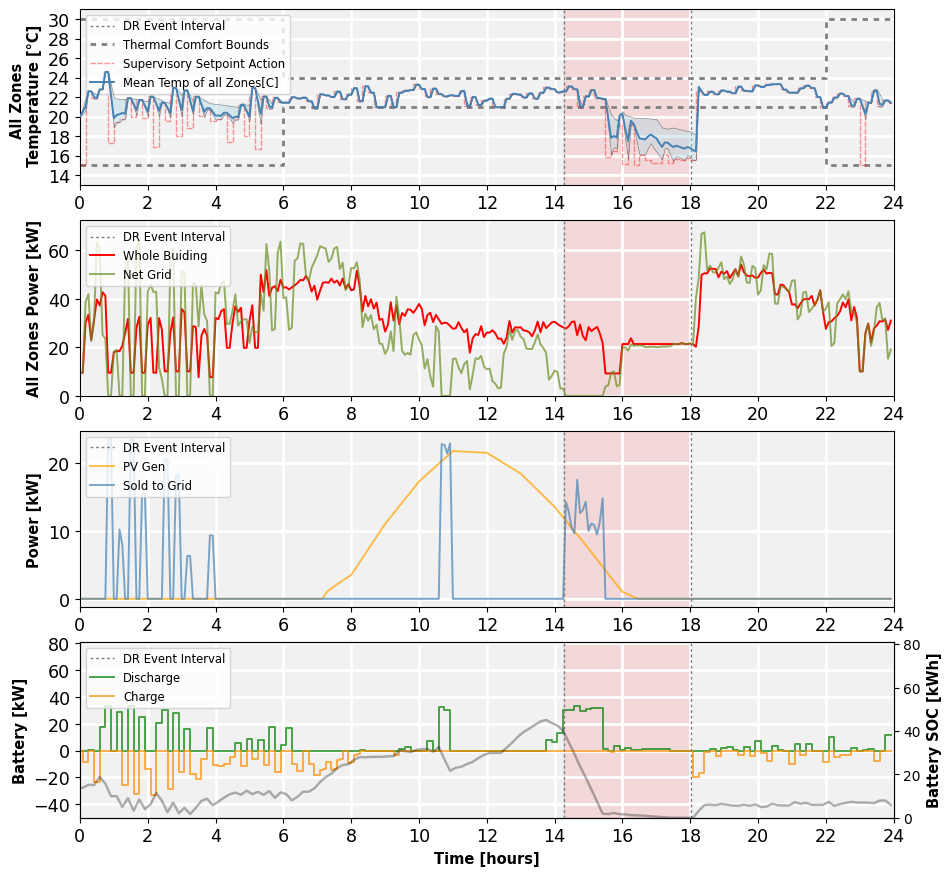

In [80]:
zones = ['0','1','2','3','4','tot']
plot_name = file_name[:-4]+"_normal_run.jpg"
zone_names = ['Core Zone','South Zone','East Zone','North Zone','West Zone']
if 'tot' in zones:
  zones.remove('tot')
  plot_total = True
else:
  plot_total = False

scale = 0.7
ticker_x5,ticker_y5 = 2,20
rect_temp_list,rect_power_list = [],[]
min_temp_list = []
max_temp_list = []
low_rect, upp_rect, low_rect_p, upp_rect_p = -30,50,-50,80000
legend_size = 12*scale
label_size = 18*scale
fontsize = 15*scale
DR_event = True
loc_1 = "upper left"
loc_2 = "upper left"
delta_sp = 7.5
no_of_plots = 4
dt = 20/60

DR_time = [df['dr_start_time'].iloc[0], df['dr_end_time'].iloc[0]]


for zone in zones:
  zone = int(zone)
  min_temp_list.append(min(df["Room_Air_Temp_Z"+str(zone)]))
  max_temp_list.append(max(df["Room_Air_Temp_Z"+str(zone)]))
  


for zone in range(no_of_plots):  
  rect_temp_list.append(Polygon(((DR_time[0]-dt, low_rect), (DR_time[0]-dt, upp_rect), (DR_time[1], upp_rect), (DR_time[1], low_rect)),
                fc=(1, 0, 0, 0.1), ec=(0, 0, 0, 1), lw=0.1, linestyle='--'))
  rect_power_list.append(Polygon(((DR_time[0]-dt, low_rect_p), (DR_time[0]-dt, upp_rect_p), (DR_time[1], upp_rect_p), (DR_time[1], low_rect_p)),
                fc=(1, 0, 0, 0.1), ec=(0, 0, 0, 1), lw=0.1, linestyle='--'))

setpt_id = ['core_zn','perimeter_zn_1','perimeter_zn_2','perimeter_zn_3','perimeter_zn_4']
power_id = ['senPowCor_y','senPowPer1_y','senPowPer2_y','senPowPer3_y','senPowPer4_y']
max_pow = [df[x].max() for x in power_id]



min_temp = min(math.floor(min(min_temp_list))-2,14)
max_temp = max(math.ceil(max(max_temp_list))+2,31)

fig = plt.figure(figsize=(15*scale,15*scale), facecolor='white')
plot_no =0

''' Temperature Plots '''

x1a = fig.add_subplot(no_of_plots, 1, 1)
x1b = fig.add_subplot(no_of_plots, 1, 2)
x1c = fig.add_subplot(no_of_plots, 1, 3)
x1d = fig.add_subplot(no_of_plots, 1, 4)

''' Temperature Plots '''
x1a.set_xlim([0,24])
x1a.set_ylim(min_temp, max_temp)

x1a.add_artist(rect_temp_list[0])
x1a.xaxis.set_major_locator(ticker.MultipleLocator(2))
x1a.yaxis.set_major_locator(ticker.MultipleLocator(2))
x1a.axvline(x=DR_time[0]-dt, color='grey', linestyle='--', linewidth=1, dashes=(2, 2))
x1a.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1,
            dashes=(2, 2))
x1a.set_ylabel('Temperature [C]')
x1a.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1a.grid(which='major', linewidth=2, color='white',zorder=3)
x1a.step(df1['senHouDec_y'],df1["UpperSetp["+setpt_id[zone]+"]"] - 273.15,where="post", color='grey', dashes=(2, 2), ls='--', label='Thermal Comfort Bounds',linewidth=2)
x1a.step(df1['senHouDec_y'],df1["LowerSetp["+setpt_id[zone]+"]"] - 273.15, where="post", color='grey', dashes=(2, 2), ls='--', linewidth=2)
x1a.fill_between(np.array(df['senHouDec_y'],dtype=float), np.array(df['maxTemp_y']-273.15,dtype=float),np.array(df['minTemp_y']-273.15,dtype=float),facecolor='lightblue', edgecolor='k', linewidth=0.5, zorder=6, alpha=0.4)
x1a.step(df['senHouDec_y'], 22.5+df['act_01']*7.5,where="post", color='r',dashes=(4, 1), ls='--',linewidth =1,label='Supervisory Setpoint Action',alpha=0.4)
x1a.plot(df['senHouDec_y'],df["meanTemp_y"] - 273.15,label='Mean Temp of all Zones[C]', color="steelblue", linewidth=2*scale,zorder=11)
x1a.patch.set_alpha(0.4)
x1a.set_ylabel('All Zones \n Temperature [°C]',fontsize=fontsize,fontweight='bold')
x1a.set_facecolor("gainsboro")
x1a.tick_params(axis='y', labelsize= label_size)
x1a.tick_params(axis='x', labelsize= label_size)
x1a.legend(loc=loc_1,prop={'size': legend_size})

''' Power Plots '''
x1b.add_artist(rect_power_list[0])
x1b.set_ylim(0,5+ max(df["net_grid_power"]/1000))
x1b.set_xlim([0,24])
x1b.axvline(x=DR_time[0]-dt, color='grey', linestyle='--', linewidth=1, dashes=(2, 2),zorder=7)
x1b.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1, dashes=(2, 2),zorder=7)
# x2b.set_ylabel('Watts [W]',fontsize=18)
x1b.xaxis.set_major_locator(ticker.MultipleLocator(ticker_x5))
x1b.yaxis.set_major_locator(ticker.MultipleLocator(ticker_y5))
x1b.tick_params(axis='y', labelsize= label_size)
x1b.tick_params(axis='x', labelsize= label_size)
x1b.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1b.grid(which='major', linewidth=2, color='white',zorder=3)
x1b.set_facecolor("gainsboro")
x1b.patch.set_alpha(0.4)
x1b.tick_params(axis='y', labelsize= label_size)
x1b.tick_params(axis='x', labelsize= label_size)
x1b.plot(df['senHouDec_y'],df["tot_building_power"]/1000, color='r',label="Whole Buiding",linewidth=2*scale)
x1b.plot(df['senHouDec_y'],df["net_grid_power"]/1000, color='olivedrab',alpha=0.7,label="Net Grid",linewidth=2*scale)
x1b.set_ylabel('All Zones Power [kW]',fontsize=fontsize,fontweight='bold')
x1b.legend(loc=loc_2, prop={'size': legend_size})


x1c.add_artist(rect_power_list[1])
# x1c.set_ylim(0,80)
x1c.set_xlim([0,24])
x1c.axvline(x=DR_time[0]-dt, color='grey', linestyle='--', linewidth=1, dashes=(2, 2),zorder=7)
x1c.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1, dashes=(2, 2),zorder=7)
# x2b.set_ylabel('Watts [W]',fontsize=18)
x1c.xaxis.set_major_locator(ticker.MultipleLocator(ticker_x5))
x1c.yaxis.set_major_locator(ticker.MultipleLocator(int(ticker_y5/2)))
x1c.tick_params(axis='y', labelsize= label_size)
x1c.tick_params(axis='x', labelsize= label_size)
x1c.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1c.grid(which='major', linewidth=2, color='white',zorder=3)
x1c.set_facecolor("gainsboro")
x1c.patch.set_alpha(0.4)
x1c.tick_params(axis='y', labelsize= label_size)
x1c.tick_params(axis='x', labelsize= label_size)
x1c.plot(df['senHouDec_y'],df["pv_pow"]/1000, color='orange',label="PV Gen",linewidth=2*scale,alpha=0.7)
x1c.plot(df['senHouDec_y'],df["pow_sold"]/1000, color='steelblue',alpha=0.7,label="Sold to Grid",linewidth=2*scale)
x1c.set_ylabel('Power [kW]',fontsize=fontsize,fontweight='bold')
x1c.legend(loc=loc_2, prop={'size': legend_size})


x1d.add_artist(rect_power_list[2])
x1d.set_ylim(-50,81)
x1d.set_xlim([0,24])
x1d.axvline(x=DR_time[0]-dt, color='grey', linestyle='--', linewidth=1, dashes=(2, 2),zorder=7)
x1d.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1, dashes=(2, 2),zorder=7)
# x2b.set_ylabel('Watts [W]',fontsize=18)
x1d.set_xlabel('Time [hours]',fontsize=fontsize,fontweight='bold')
x1d.xaxis.set_major_locator(ticker.MultipleLocator(ticker_x5))
x1d.yaxis.set_major_locator(ticker.MultipleLocator(ticker_y5))
x1d.tick_params(axis='y', labelsize= label_size)
x1d.tick_params(axis='x', labelsize= label_size)
x1d.grid(which='both', linewidth=0.5, color='white',zorder=3)
x1d.grid(which='major', linewidth=2, color='white',zorder=3)
x1d.set_facecolor("gainsboro")
x1d.patch.set_alpha(0.4)
x1d.tick_params(axis='y', labelsize= label_size)
x1d.tick_params(axis='x', labelsize= label_size)

x1d.step(df['senHouDec_y'],df['batt_pow_dem']/1000, color='green',alpha=0.7,label="Discharge",linewidth=2*scale)
x1d.step(df['senHouDec_y'],df['batt_pow_disc']/1000*-1, color='darkorange',alpha=0.7,label="Charge",linewidth=2*scale)
x1d.set_ylabel('Battery [kW]',fontsize=fontsize,fontweight='bold')
x1d.legend(loc=loc_2, prop={'size': legend_size})


x2d=x1d.twinx()
x2d.plot(df['senHouDec_y'],df['cur_soc'], color='k',alpha=0.3,label="Batt SOC",linewidth=2.5*scale)
x2d.set_ylabel('Battery SOC [kWh]',fontsize=fontsize,fontweight='bold')
x2d.set_ylim(0,81)



fig.canvas.draw()
# time.sleep(0.1)
fig.savefig(path[:-8]+'05_Plot/'+plot_name, dpi=400)
fig.show()

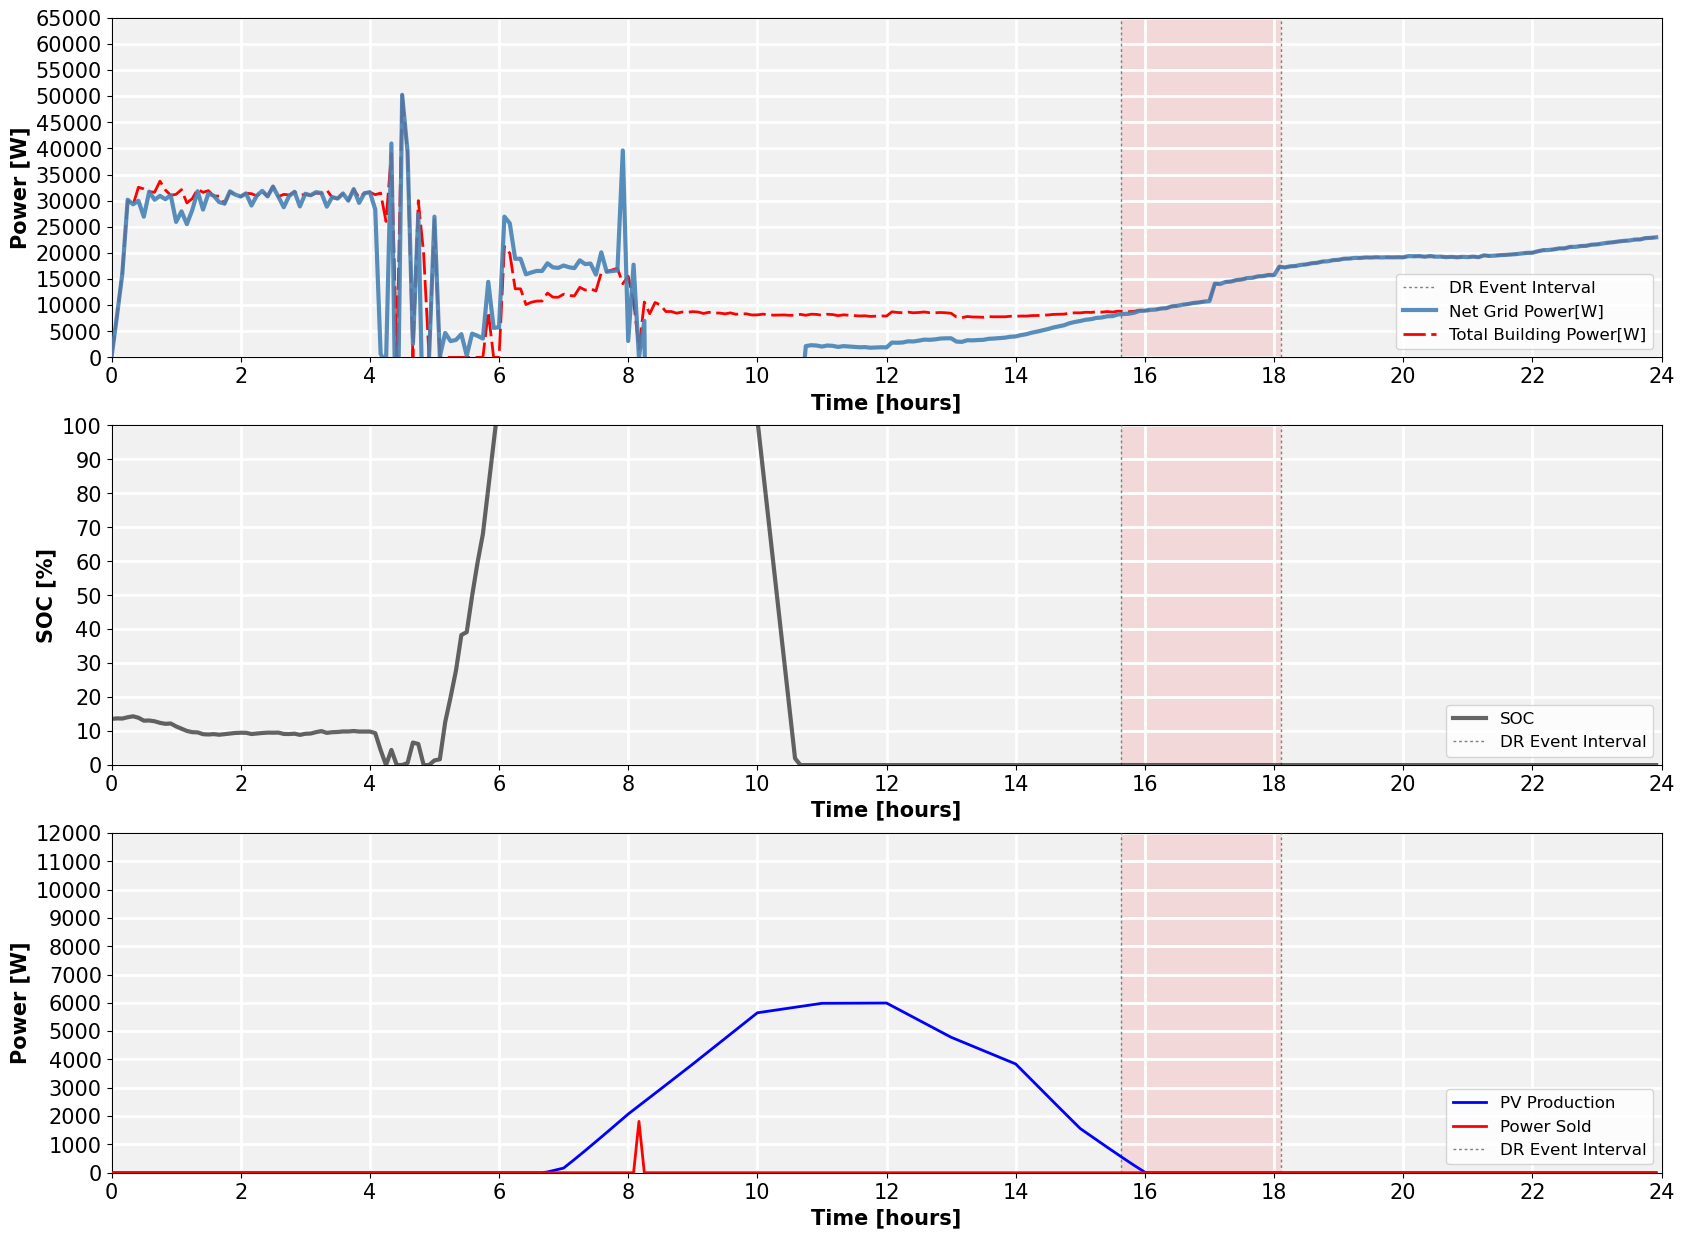

In [19]:
plot_name_2 = 'battery_plot.jpg'
figs = 3 

fig_2 = plt.figure(figsize=(20, 15), facecolor='white')

rect_temp_list = []
rect_power_list = []

for fig in range(figs):   
    rect_temp_list.append(Polygon(((DR_time[0], low_rect), (DR_time[0], upp_rect), (DR_time[1], upp_rect), (DR_time[1], low_rect)),
                  fc=(1, 0, 0, 0.1), ec=(0, 0, 0, 1), lw=0, linestyle='--'))
    rect_power_list.append(Polygon(((DR_time[0], low_rect_p), (DR_time[0], upp_rect_p), (DR_time[1], upp_rect_p), (DR_time[1], low_rect_p)),
                  fc=(1, 0, 0, 0.1), ec=(0, 0, 0, 1), lw=0, linestyle='--'))

x3a = fig_2.add_subplot(3,1,1)
x3b = fig_2.add_subplot(3,1,2)
x3c = fig_2.add_subplot(3,1,3)

''' Temperature Plots '''
x3a.set_xlim([0,24])
x3a.set_ylim(0,65000)
if DR_event == True:
     x3a.add_artist(rect_power_list[0])
x3a.xaxis.set_major_locator(ticker.MultipleLocator(2))
x3a.yaxis.set_major_locator(ticker.MultipleLocator(5000))
x3a.axvline(x=DR_time[0], color='grey', linestyle='--', linewidth=1, dashes=(2, 2))
x3a.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1,
               dashes=(2, 2))
x3a.set_ylabel('Temperature [C]')
x3a.grid(which='both', linewidth=0.5, color='white',zorder=3)
x3a.grid(which='major', linewidth=2, color='white',zorder=3)
x3a.plot(df['senHouDec_y'],df["net_grid_power"],label='Net Grid Power[W]', color="steelblue", linewidth=3,zorder=13,alpha=0.9)
x3a.plot(df['senHouDec_y'],df["tot_building_power"],label='Total Building Power[W]',dashes=(8, 2),color="red", linewidth=2,zorder=11)
x3a.patch.set_alpha(0.4)
x3a.set_ylabel('Power [W]',fontsize=15,fontweight='bold')
x3a.set_xlabel('Time [hours]',fontsize=15,fontweight='bold')
x3a.set_facecolor("gainsboro")
x3a.tick_params(axis='y', labelsize= 15)
x3a.tick_params(axis='x', labelsize= 15)
x3a.legend(loc=loc_1,prop={'size': legend_size})

''' Power Plots '''
if DR_event == True:
     x3b.add_artist(rect_power_list[1])
x3b.set_ylim(0,100)
x3b.set_xlim([0,24])
x3b.xaxis.set_major_locator(ticker.MultipleLocator(ticker_x5))
x3b.yaxis.set_major_locator(ticker.MultipleLocator(10))
x3b.plot(df['senHouDec_y'],df["cur_soc"]/13.5*100,label='SOC', color="k", linewidth=3,zorder=11,alpha=0.6)
x3b.axvline(x=DR_time[0], color='grey', linestyle='--', linewidth=1, dashes=(2, 2),zorder=7)
x3b.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1, dashes=(2, 2),zorder=7)
# x2b.set_ylabel('Watts [W]',fontsize=18)
x3b.set_xlabel('Time [hours]',fontsize=15,fontweight='bold')
x3b.tick_params(axis='y', labelsize= 15)
x3b.tick_params(axis='x', labelsize= 15)
x3b.grid(which='both', linewidth=0.5, color='white',zorder=3)
x3b.grid(which='major', linewidth=2, color='white',zorder=3)
x3b.set_facecolor("gainsboro")
x3b.patch.set_alpha(0.4)
x3b.tick_params(axis='y', labelsize= 15)
x3b.tick_params(axis='x', labelsize= 15)
x3b.set_ylabel('SOC [%]',fontsize=15,fontweight='bold')
x3b.legend(loc=loc_2, prop={'size': legend_size})

if DR_event == True:
     x3c.add_artist(rect_power_list[2])
x3c.set_ylim(0,12000)
x3c.set_xlim([0,24])
x3c.xaxis.set_major_locator(ticker.MultipleLocator(ticker_x5))
x3c.plot(df['senHouDec_y'],df["pv_pow"],label='PV Production', color="b", linewidth=2,zorder=11)
x3c.plot(df['senHouDec_y'],df["pow_sold"],label='Power Sold', color="r", linewidth=2,zorder=11)
x3c.axvline(x=DR_time[0], color='grey', linestyle='--', linewidth=1, dashes=(2, 2),zorder=7)
x3c.axvline(x=DR_time[1], color='grey', linestyle='--', label='DR Event Interval', linewidth=1, dashes=(2, 2),zorder=7)
# x2b.set_ylabel('Watts [W]',fontsize=18)
x3c.set_xlabel('Time [hours]',fontsize=15,fontweight='bold')
x3c.yaxis.set_major_locator(ticker.MultipleLocator(1000))
x3c.tick_params(axis='y', labelsize= 15)
x3c.tick_params(axis='x', labelsize= 15)
x3c.grid(which='both', linewidth=0.5, color='white',zorder=3)
x3c.grid(which='major', linewidth=2, color='white',zorder=3)
x3c.set_facecolor("gainsboro")
x3c.patch.set_alpha(0.4)
x3c.tick_params(axis='y', labelsize= 15)
x3c.tick_params(axis='x', labelsize= 15)
x3c.set_ylabel('Power [W]',fontsize=15,fontweight='bold')
x3c.legend(loc=loc_2, prop={'size': legend_size})

fig_2.canvas.draw()
# time.sleep(0.1)
fig_2.savefig(plot_name_2, dpi=400)